<a href="https://colab.research.google.com/github/DajeanArcila/DajeanArcila/blob/main/TestADFEstacionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# serie no estacional

en este codigo indicamos como volver estacionales datos que no lo son para asi usarlos em modelos de pronosticos de valores


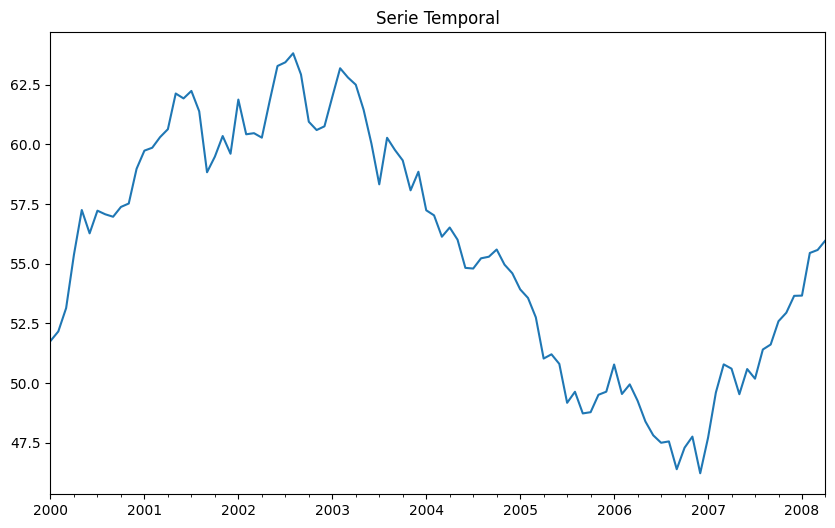

ADF Statistic: -1.132038462509789
p-value: 0.7021277385898388
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583
No rechazar H0: La serie temporal no es estacionaria


In [4]:
#serie no estacional
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Crear datos de ejemplo (serie no estacionaria)
np.random.seed(0)
data = np.random.randn(100).cumsum() + 50
date_range = pd.date_range(start='1/1/2000', periods=len(data), freq='M')
time_series = pd.Series(data, index=date_range)

# Graficar la serie temporal
time_series.plot(title='Serie Temporal', figsize=(10, 6))
plt.show()

# Aplicar el test ADF
result = adfuller(time_series)

# Mostrar los resultados del test ADF
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretación del resultado
if result[1] <= 0.05:
    print("Rechazar H0: La serie temporal es estacionaria")
else:
    print("No rechazar H0: La serie temporal no es estacionaria")


# serie estacionaria

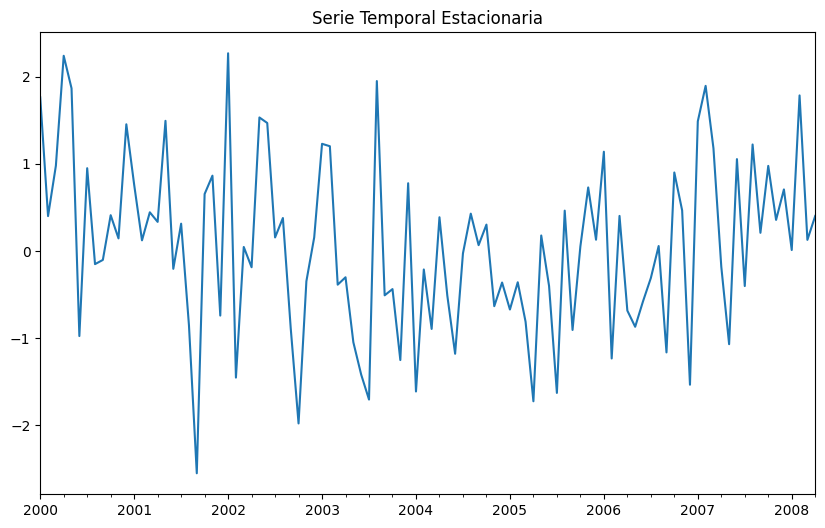

ADF Statistic: -9.298574759765579
p-value: 1.1285451053950947e-15
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583
Rechazar H0: La serie temporal es estacionaria


In [5]:
# Crear datos de ejemplo (serie estacionaria)
np.random.seed(0)
data_stationary = np.random.randn(100)
date_range_stationary = pd.date_range(start='1/1/2000', periods=len(data_stationary), freq='M')
time_series_stationary = pd.Series(data_stationary, index=date_range_stationary)

# Graficar la serie temporal
time_series_stationary.plot(title='Serie Temporal Estacionaria', figsize=(10, 6))
plt.show()

# Aplicar el test ADF
result_stationary = adfuller(time_series_stationary)

# Mostrar los resultados del test ADF
print('ADF Statistic:', result_stationary[0])
print('p-value:', result_stationary[1])
print('Critical Values:')
for key, value in result_stationary[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretación del resultado
if result_stationary[1] <= 0.05:
    print("Rechazar H0: La serie temporal es estacionaria")
else:
    print("No rechazar H0: La serie temporal no es estacionaria")


# comenzando el codigo

In [6]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cargar los datos desde un archivo CSV
# Asegúrate de cambiar "tus_datos.csv" por la ruta real de tu archivo
dataset = pd.read_excel("/content/BaseDeDatosLista_1planilla.xlsx")

# Mostrar las primeras filas del dataset para verificar
dataset.head()


,Data,Último,Abertura,Máxima,Mínima,Vol/,Var%,DATA,RESERVAS
0,2024-04-30,5.1934,5.1190,5.1975,5.1133,95.19,0.0146,2024-04-30,351.599
1,2024-04-29,5.1189,5.1170,5.1227,5.1020,95.19,0.0007,2024-04-29,351.599
2,2024-04-26,5.1151,5.1615,5.1673,5.1085,95.19,-0.0087,2024-04-26,351.599
3,2024-04-25,5.1602,5.1472,5.1935,5.1099,95.19,0.0028,2024-04-25,351.599
4,2024-04-24,5.1457,5.1263,5.1720,5.1238,95.19,0.0038,2024-04-24,351.599


In [7]:
# Eliminar columnas no deseadas
dataset = dataset.drop(columns=['Var%', 'DATA'])  # Reemplaza 'Column7' y 'Column6' por los nombres reales

In [8]:
# Asegurarse de que la columna de fecha esté en el formato correcto
dataset['Data'] = pd.to_datetime(dataset['Data'])
dataset.set_index('Data', inplace=True)

In [9]:
# Calcular la columna 'Mean' como el promedio de los precios alto y bajo
dataset['Mean'] = (dataset['Máxima'] + dataset['Mínima']) / 2
# Diferenciación



In [10]:
# Diferenciación
dataset['Mean_diff'] = dataset['Mean'].diff()
dataset.dropna(inplace=True)

In [11]:
# Mostrar las primeras filas para verificar el cálculo de 'Mean'
print(dataset.head())



            Último  Abertura  Máxima  Mínima   Vol/  RESERVAS     Mean  \
Data                                                                     
2024-04-29  5.1189    5.1170  5.1227  5.1020  95.19   351.599  5.11235   
2024-04-26  5.1151    5.1615  5.1673  5.1085  95.19   351.599  5.13790   
2024-04-25  5.1602    5.1472  5.1935  5.1099  95.19   351.599  5.15170   
2024-04-24  5.1457    5.1263  5.1720  5.1238  95.19   351.599  5.14790   
2024-04-23  5.1260    5.1674  5.1894  5.1182  95.19   351.599  5.15380   

            Mean_diff  
Data                   
2024-04-29   -0.04305  
2024-04-26    0.02555  
2024-04-25    0.01380  
2024-04-24   -0.00380  
2024-04-23    0.00590  


In [12]:
# Selecciona la columna que contiene la serie temporal que quieres analizar
# En este caso, usaremos la columna 'Mean'
time_series = dataset['Mean']
# Eliminar NaNs resultantes de la diferenciación
dataset.dropna(inplace=True)

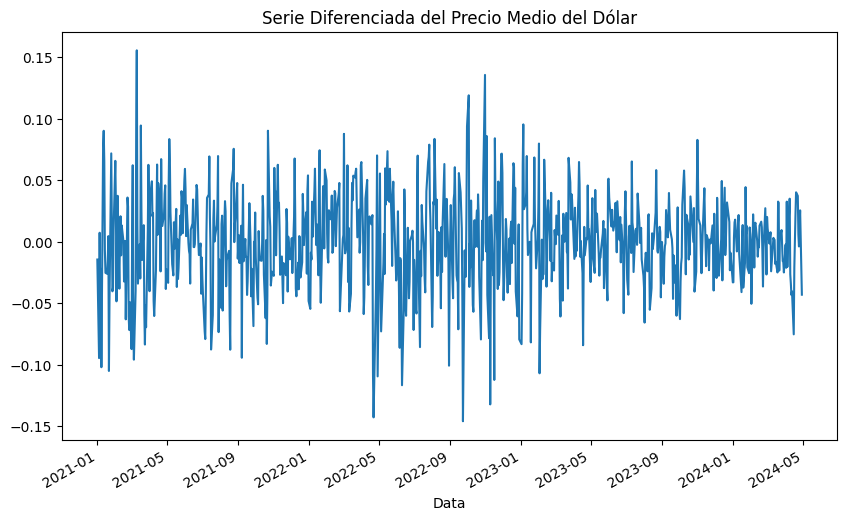

In [13]:
# Graficar la serie diferenciada
dataset['Mean_diff'].plot(title='Serie Diferenciada del Precio Medio del Dólar', figsize=(10, 6))
plt.show()

In [14]:
# Aplicar el test ADF a la serie diferenciada
result_diff = adfuller(dataset['Mean_diff'])

In [15]:
# Mostrar los resultados del test ADF
print('ADF Statistic (diferenciada):', result_diff[0])
print('p-value (diferenciada):', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretación del resultado
if result_diff[1] <= 0.05:
    print("Rechazar H0: La serie temporal diferenciada es estacionaria")
else:
    print("No rechazar H0: La serie temporal diferenciada no es estacionaria")

ADF Statistic (diferenciada): -20.295263373895338
p-value (diferenciada): 0.0
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
Rechazar H0: La serie temporal diferenciada es estacionaria


In [16]:
#en este codigo aplicamos la diferenciacion porque es mas simple


###recordando que podemos hacer una serie temporal estacional con los siguientes metodos

Diferenciación:

Transformaciones de Potencia o Logarítmicas:

Descomposición Estacional:

####Aplicación Práctica
Aquí hay un ejemplo práctico de cómo aplicar la diferenciación y la transformación logarítmica a una serie temporal, y cómo podrías proceder con la descomposición estacional:

In [17]:
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Supongamos que 'dataset' es tu DataFrame con la columna 'Mean'
dataset = pd.read_csv("tus_datos.csv")
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True)
dataset['Mean'] = (dataset['High'] + dataset['Low']) / 2

# Diferenciación
dataset['Mean_diff'] = dataset['Mean'].diff()
dataset.dropna(inplace=True)

# Test de ADF en serie diferenciada
result_diff = adfuller(dataset['Mean_diff'])
print('ADF Statistic (diferenciada):', result_diff[0])
print('p-value (diferenciada):', result_diff[1])

# Transformación logarítmica seguida de diferenciación
dataset['Mean_log'] = np.log(dataset['Mean'])
dataset['Mean_log_diff'] = dataset['Mean_log'].diff()
dataset.dropna(inplace=True)

# Test de ADF en serie logarítmica diferenciada
result_log_diff = adfuller(dataset['Mean_log_diff'])
print('ADF Statistic (logarítmica diferenciada):', result_log_diff[0])
print('p-value (logarítmica diferenciada):', result_log_diff[1])

# Descomposición estacional
decomposition = sm.tsa.seasonal_decompose(dataset['Mean'], model='additive', period=365)
decomposition.plot()
plt.show()

# Test de ADF en los residuos de la descomposición
residual = decomposition.resid.dropna()
result_resid = adfuller(residual)
print('ADF Statistic (residual):', result_resid[0])
print('p-value (residual):', result_resid[1])
'''

#transformacion logaritmica
'''
# Aplicar una transformación logarítmica
dataset['Mean_log'] = np.log(dataset['Mean'])

# Diferenciación de la serie logarítmica
dataset['Mean_log_diff'] = dataset['Mean_log'].diff()

# Eliminar NaNs resultantes de la diferenciación
dataset.dropna(inplace=True)

# Graficar la serie logarítmica diferenciada
dataset['Mean_log_diff'].plot(title='Serie Logarítmica Diferenciada del Precio Medio del Dólar', figsize=(10, 6))
plt.show()

# Aplicar el test ADF a la serie logarítmica diferenciada
result_log_diff = adfuller(dataset['Mean_log_diff'])

# Mostrar los resultados del test ADF
print('ADF Statistic (logarítmica diferenciada):', result_log_diff[0])
print('p-value (logarítmica diferenciada):', result_log_diff[1])
print('Critical Values:')
for key, value in result_log_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretación del resultado
if result_log_diff[1] <= 0.05:
    print("Rechazar H0: La serie temporal logarítmica diferenciada es estacionaria")
else:
    print("No rechazar H0: La serie temporal logarítmica diferenciada no es estacionaria")

'''
#Descomposición Estacional
#Si sospechas que hay una componente estacional que no es capturada simplemente con diferenciación, puedes usar la descomposición estacional:

'''
import statsmodels.api as sm

# Descomposición estacional
decomposition = sm.tsa.seasonal_decompose(dataset['Mean'], model='additive', period=365)
decomposition.plot()
plt.show()

# Trabajar con los componentes residuales que deberían ser estacionarios
residual = decomposition.resid.dropna()

# Aplicar el test ADF a los residuales
result_resid = adfuller(residual)

# Mostrar los resultados del test ADF
print('ADF Statistic (residual):', result_resid[0])
print('p-value (residual):', result_resid[1])
print('Critical Values:')
for key, value in result_resid[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretación del resultado
if result_resid[1] <= 0.05:
    print("Rechazar H0: La componente residual es estacionaria")
else:
    print("No rechazar H0: La componente residual no es estacionaria")


'''

#Siguientes Pasos
#Aplicar Diferenciación: Si una primera diferenciación no es suficiente, intenta con una segunda diferenciación (dataset['Mean_diff2'] = dataset['Mean_diff'].diff()).
#Modelos: Una vez que la serie sea estacionaria, puedes aplicar modelos como ARIMA o SARIMAX.

'\nimport statsmodels.api as sm\n\n# Descomposición estacional\ndecomposition = sm.tsa.seasonal_decompose(dataset[\'Mean\'], model=\'additive\', period=365)\ndecomposition.plot()\nplt.show()\n\n# Trabajar con los componentes residuales que deberían ser estacionarios\nresidual = decomposition.resid.dropna()\n\n# Aplicar el test ADF a los residuales\nresult_resid = adfuller(residual)\n\n# Mostrar los resultados del test ADF\nprint(\'ADF Statistic (residual):\', result_resid[0])\nprint(\'p-value (residual):\', result_resid[1])\nprint(\'Critical Values:\')\nfor key, value in result_resid[4].items():\n    print(\'\t%s: %.3f\' % (key, value))\n\n# Interpretación del resultado\nif result_resid[1] <= 0.05:\n    print("Rechazar H0: La componente residual es estacionaria")\nelse:\n    print("No rechazar H0: La componente residual no es estacionaria")\n\n\n'

# continuacion del codigo de dolar


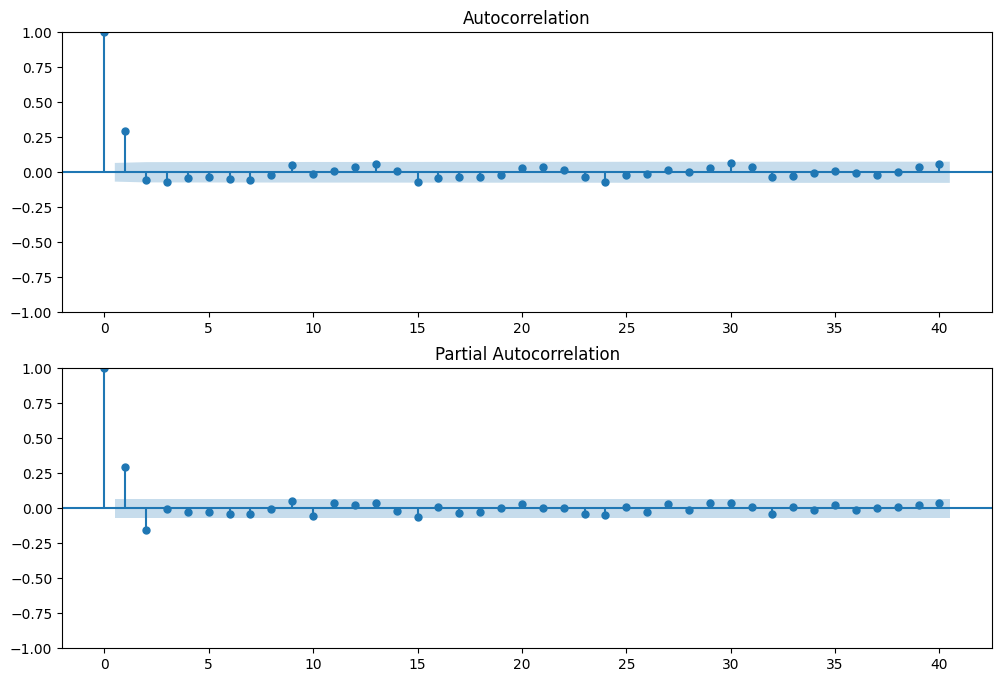

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calcular ACF y PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(dataset['Mean_diff'].dropna(), lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(dataset['Mean_diff'].dropna(), lags=40, ax=axes[1])
plt.show()


In [19]:
#de aqui para abajo fue definido por mi y chatgpt

In [20]:
train_size = int(len(dataset) * 0.8)
train, test = dataset[0:train_size], dataset[train_size:]


In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

# Definir rangos para los parámetros
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = float("inf")
best_order = None
best_seasonal_order = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train['Mean'],
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = param_seasonal
        except:
            continue

print('Best SARIMA{}x{}12 AIC:{}'.format(best_order, best_seasonal_order, best_aic))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Best SARIMA(1, 0, 1)x(0, 0, 0, 12)12 AIC:-2647.12132404798


In [22]:
print(dataset.index)



DatetimeIndex(['2024-04-29', '2024-04-26', '2024-04-25', '2024-04-24',
               '2024-04-23', '2024-04-22', '2024-04-19', '2024-04-18',
               '2024-04-17', '2024-04-16',
               ...
               '2021-01-14', '2021-01-13', '2021-01-12', '2021-01-11',
               '2021-01-08', '2021-01-07', '2021-01-06', '2021-01-05',
               '2021-01-04', '2021-01-01'],
              dtype='datetime64[ns]', name='Data', length=862, freq=None)


In [23]:
dataset = dataset.asfreq('D')


In [24]:
print(dataset.index)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2024-04-20', '2024-04-21', '2024-04-22', '2024-04-23',
               '2024-04-24', '2024-04-25', '2024-04-26', '2024-04-27',
               '2024-04-28', '2024-04-29'],
              dtype='datetime64[ns]', name='Data', length=1215, freq='D')


In [25]:
dataset = dataset.sort_index()


In [26]:
'''
model = sm.tsa.SARIMAX(train['Mean'],
                       order=(1, 0, 1),
                       seasonal_order=(0, 0, 0, 12))
model_fit = model.fit(disp=False)

'''#antes esta parte iba aqui pero la cambiamos para que las

"\nmodel = sm.tsa.SARIMAX(train['Mean'],\n                       order=(1, 0, 1),\n                       seasonal_order=(0, 0, 0, 12))\nmodel_fit = model.fit(disp=False)\n\n"

In [27]:
print(train.index)
print(test.index)


DatetimeIndex(['2024-04-29', '2024-04-26', '2024-04-25', '2024-04-24',
               '2024-04-23', '2024-04-22', '2024-04-19', '2024-04-18',
               '2024-04-17', '2024-04-16',
               ...
               '2021-09-14', '2021-09-13', '2021-09-10', '2021-09-09',
               '2021-09-08', '2021-09-07', '2021-09-06', '2021-09-03',
               '2021-09-02', '2021-09-01'],
              dtype='datetime64[ns]', name='Data', length=689, freq=None)
DatetimeIndex(['2021-08-31', '2021-08-30', '2021-08-27', '2021-08-26',
               '2021-08-25', '2021-08-24', '2021-08-23', '2021-08-20',
               '2021-08-19', '2021-08-18',
               ...
               '2021-01-14', '2021-01-13', '2021-01-12', '2021-01-11',
               '2021-01-08', '2021-01-07', '2021-01-06', '2021-01-05',
               '2021-01-04', '2021-01-01'],
              dtype='datetime64[ns]', name='Data', length=173, freq=None)


In [28]:
# Supongamos que tienes un DataFrame original llamado dataset
dataset = dataset[['Mean']]  # Asegúrate de que estás utilizando la columna 'Mean'


train = dataset[train_size:]
test = dataset[:train_size]# aqui invertimos los valores para obtener los datos de prueba que queremos(los ultimos)

# Ahora intercambia las variables de entrenamiento y prueba
train, test = test, train

# Verifica los resultados
print("Train set:")
print(train)
print("\nTest set:")
print(test)


Train set:
               Mean
Data               
2021-01-01  5.19400
2021-01-02      NaN
2021-01-03      NaN
2021-01-04  5.20845
2021-01-05  5.30310
...             ...
2022-11-16  5.34625
2022-11-17  5.45865
2022-11-18  5.37445
2022-11-19      NaN
2022-11-20      NaN

[689 rows x 1 columns]

Test set:
               Mean
Data               
2022-11-21  5.34060
2022-11-22  5.33995
2022-11-23  5.37835
2022-11-24  5.32935
2022-11-25  5.36455
...             ...
2024-04-25  5.15170
2024-04-26  5.13790
2024-04-27      NaN
2024-04-28      NaN
2024-04-29  5.11235

[526 rows x 1 columns]


In [29]:
print(train.index)
print(test.index)


DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2022-11-11', '2022-11-12', '2022-11-13', '2022-11-14',
               '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
               '2022-11-19', '2022-11-20'],
              dtype='datetime64[ns]', name='Data', length=689, freq='D')
DatetimeIndex(['2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30',
               ...
               '2024-04-20', '2024-04-21', '2024-04-22', '2024-04-23',
               '2024-04-24', '2024-04-25', '2024-04-26', '2024-04-27',
               '2024-04-28', '2024-04-29'],
              dtype='datetime64[ns]', name='Data', length=526, freq='D')


In [30]:
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

train = train.sort_index()
test = test.sort_index()

print("Train index (after conversion and sorting):")
print(train.index)
print("\nTest index (after conversion and sorting):")
print(test.index)

Train index (after conversion and sorting):
DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2022-11-11', '2022-11-12', '2022-11-13', '2022-11-14',
               '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
               '2022-11-19', '2022-11-20'],
              dtype='datetime64[ns]', name='Data', length=689, freq='D')

Test index (after conversion and sorting):
DatetimeIndex(['2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30',
               ...
               '2024-04-20', '2024-04-21', '2024-04-22', '2024-04-23',
               '2024-04-24', '2024-04-25', '2024-04-26', '2024-04-27',
               '2024-04-28', '2024-04-29'],
              dtype='datetime64[ns]', name='Data', length=5

In [31]:
print(f"Train start date: {train.index[0]}")
print(f"Train end date: {train.index[-1]}")
print(f"Test start date: {test.index[0]}")
print(f"Test end date: {test.index[-1]}")




Train start date: 2021-01-01 00:00:00
Train end date: 2022-11-20 00:00:00
Test start date: 2022-11-21 00:00:00
Test end date: 2024-04-29 00:00:00


In [32]:
model = sm.tsa.SARIMAX(train['Mean'],
                       order=(1, 0, 1),
                       seasonal_order=(0, 0, 0, 12))
model_fit = model.fit(disp=False)


In [33]:
# Predicciones en el conjunto de entrenamiento
pred_train = model_fit.predict(start=train.index[0], end=train.index[-1], dynamic=False)

# Predicciones en el conjunto de prueba
pred_test = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)


In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Eliminar NaN en las predicciones y datos reales
train = train.dropna()
test = test.dropna()
pred_train = pred_train.dropna()
pred_test = pred_test.dropna()

# Alinear las predicciones con los datos reales para evitar NaNs
aligned_train, aligned_pred_train = train['Mean'].align(pred_train, join='inner')
aligned_test, aligned_pred_test = test['Mean'].align(pred_test, join='inner')

# Calcular RMSE para el conjunto de entrenamiento
rmse_train = np.sqrt(mean_squared_error(aligned_train, aligned_pred_train))
print(f'RMSE en el conjunto de entrenamiento: {rmse_train}')
'''
# Calcular RMSE para el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(aligned_test, aligned_pred_test))
print(f'RMSE en el conjunto de prueba: {rmse_test}')
'''


RMSE en el conjunto de entrenamiento: 0.2381893654491901


"\n# Calcular RMSE para el conjunto de prueba\nrmse_test = np.sqrt(mean_squared_error(aligned_test, aligned_pred_test))\nprint(f'RMSE en el conjunto de prueba: {rmse_test}')\n"

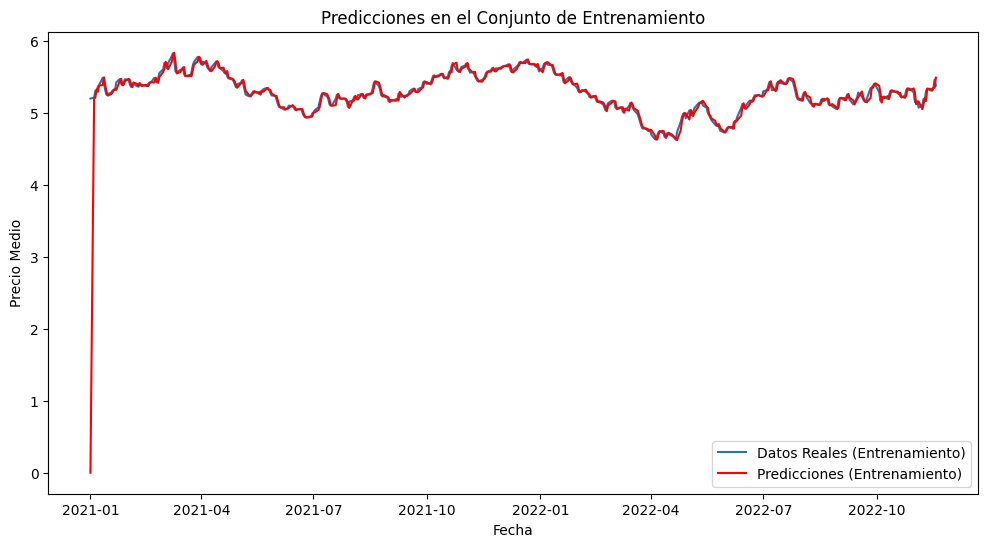

"\n# Gráfico del conjunto de prueba\nplt.figure(figsize=(12, 6))\nplt.plot(aligned_test.index, aligned_test, label='Datos Reales (Prueba)')\nplt.plot(aligned_pred_test.index, aligned_pred_test, label='Predicciones (Prueba)', color='red')\nplt.title('Predicciones en el Conjunto de Prueba')\nplt.xlabel('Fecha')\nplt.ylabel('Precio Medio')\nplt.legend()\nplt.show()\n\n"

In [35]:
import matplotlib.pyplot as plt

# Gráfico del conjunto de entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(aligned_train.index, aligned_train, label='Datos Reales (Entrenamiento)')
plt.plot(aligned_pred_train.index, aligned_pred_train, label='Predicciones (Entrenamiento)', color='red')
plt.title('Predicciones en el Conjunto de Entrenamiento')
plt.xlabel('Fecha')
plt.ylabel('Precio Medio')
plt.legend()
plt.show()
'''
# Gráfico del conjunto de prueba
plt.figure(figsize=(12, 6))
plt.plot(aligned_test.index, aligned_test, label='Datos Reales (Prueba)')
plt.plot(aligned_pred_test.index, aligned_pred_test, label='Predicciones (Prueba)', color='red')
plt.title('Predicciones en el Conjunto de Prueba')
plt.xlabel('Fecha')
plt.ylabel('Precio Medio')
plt.legend()
plt.show()

'''

In [36]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Asegurarse de que las longitudes de las series coincidan para el conjunto de entrenamiento
pred_train_aligned = pred_train[:len(train['Mean'])]
train_mean_aligned = train['Mean'][:len(pred_train)]

# Calcular el RMSE para el conjunto de entrenamiento
rmse_train = np.sqrt(mean_squared_error(train_mean_aligned, pred_train_aligned))

# Asegurarse de que las longitudes de las series coincidan para el conjunto de prueba
pred_test_aligned = pred_test[:len(test['Mean'])]
test_mean_aligned = test['Mean'][:len(pred_test)]

# Calcular el RMSE para el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(test_mean_aligned, pred_test_aligned))

# Calcular el % de error para el conjunto de entrenamiento
percentage_error_train = (rmse_train / train_mean_aligned.mean()) * 100

# Calcular el % de error para el conjunto de prueba
percentage_error_test = (rmse_test / test_mean_aligned.mean()) * 100

print(f'RMSE (Entrenamiento): {rmse_train}')
print(f'% de Error (Entrenamiento): {percentage_error_train}%')

print(f'RMSE (Prueba): {rmse_test}')
print(f'% de Error (Prueba): {percentage_error_test}%')


RMSE (Entrenamiento): 0.4640194505354316
% de Error (Entrenamiento): 8.786676909321422%
RMSE (Prueba): 0.3180575682209407
% de Error (Prueba): 6.338636731770854%


            Forecast  Lower CI  Upper CI
2022-11-19       NaN       NaN       NaN
2022-11-20       NaN       NaN       NaN
2022-11-21  5.348619  5.197321  5.499916
2022-11-22  5.348378  5.170923  5.525832
2022-11-23  5.348137  5.147916  5.548357
2022-11-24  5.347895  5.127247  5.568544
2022-11-25  5.347654  5.108316  5.586992
2022-11-26  5.347413  5.090745  5.604082
2022-11-27  5.347172  5.074273  5.620072
2022-11-28  5.346932  5.058716  5.635147


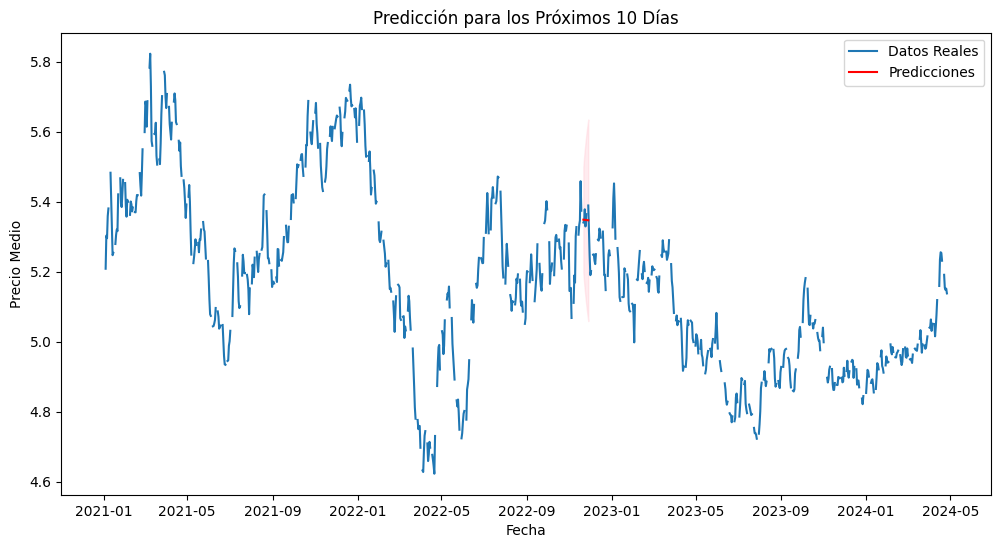

In [37]:
'''

# Generar la predicción para los próximos 10 días
forecast_steps = 10
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Crear un DataFrame para almacenar las predicciones
forecast_dates = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df = pd.DataFrame({'Forecast': forecast_mean, 'Lower CI': forecast_ci.iloc[:, 0], 'Upper CI': forecast_ci.iloc[:, 1]}, index=forecast_dates)

# Mostrar las predicciones
print(forecast_df)

# Visualizar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(dataset.index, dataset['Mean'], label='Datos Reales')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Predicciones', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='pink', alpha=0.3)
plt.title('Predicción para los Próximos 10 Días')
plt.xlabel('Fecha')
plt.ylabel('Precio Medio')
plt.legend()
plt.show()
'''